In [1]:
%matplotlib widget

In [2]:
import geopandas as gpd
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipyleaflet as leaf
import ipywidgets as ipyw
import json
from IPython.display import display_html
from itertools import chain,cycle

In [3]:
Eu =  gpd.read_file('Europe.shp')

In [4]:
Energy =  gpd.read_file('energy_data.db')

In [5]:
good_world_countries=Energy[ (Energy['Year']==2006) & (Energy['coal_share_energy'] != 0) & (Energy['gas_share_energy'] != 0) ]['country']

In [6]:
good_EU_Countries = np.intersect1d(good_world_countries, Eu['NAME'])

In [8]:
actual_countries=Eu[Eu['NAME'].isin(good_EU_Countries)]

In [12]:
m = leaf.Map(center = (50.5039, 4.4699), 
             zoom = 3, 
             layout=ipyw.Layout(width='30%', height='350px')
            )

In [13]:
geo_data = leaf.GeoData(geo_dataframe = actual_countries,
                   style={'color': 'white', 'fillColor': 'blue', 'opacity':0.6, 'weight':4.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Countries')


def on_click(event, feature, **kwargs):
    global Country

    Country = feature['properties']['NAME']
    update(Country)
    
    Country = feature['properties']['NAME']
    update1(Country)
    
geo_data.on_click(on_click)


In [14]:
def energy_breakdown(Country):
  con = sql.connect("energy_data.db")
  cur = con.cursor()
  Query1 = ("SELECT Year, oil_share_energy, coal_share_energy, gas_share_energy, nuclear_share_energy, renewables_share_energy FROM energy_stats WHERE Year > 2005 AND country == '%s'" % (Country))
  #print(Query1)
  cur.execute(Query1)
  
  data=pd.read_sql_query(Query1, con)

  return data

In [15]:
def repol(Country):
    con = sql.connect("energy_data.db")   
    cur = con.cursor()
    repol_energy = ("SELECT Year, renewables_share_energy, co2_per_capita FROM energy_stats WHERE Year > 2000 AND country == '%s'" % (Country))
    cur.execute(repol_energy)
    data1 = pd.read_sql_query(repol_energy, con)
    
    return data1

Map(center=[50.5039, 4.4699], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

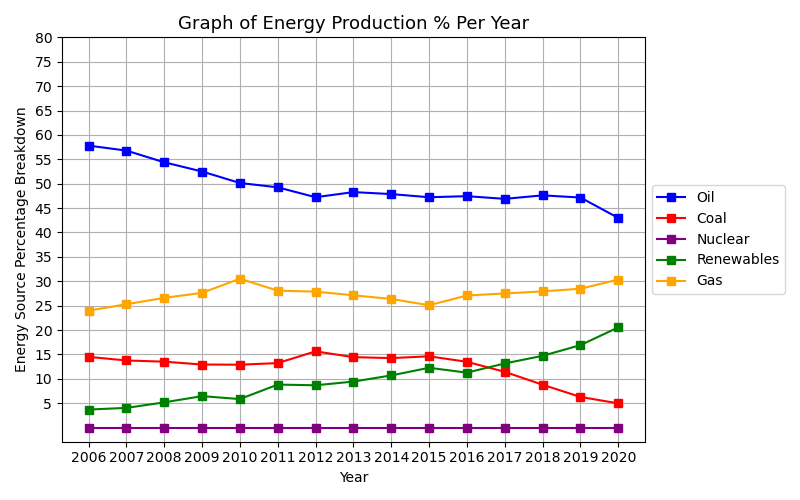

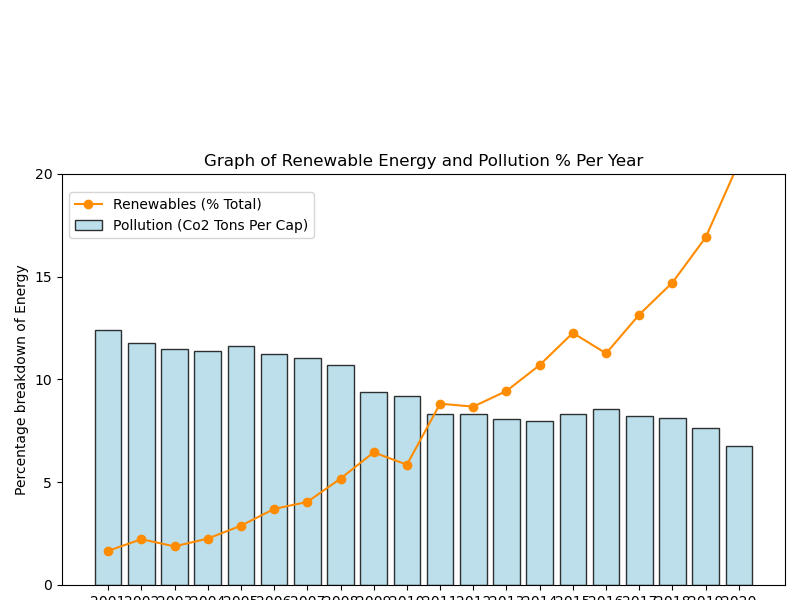

In [27]:
m = leaf.Map(center = (50.5039, 4.4699), 
             zoom = 3, 
             layout=ipyw.Layout(width='60%', height='480px')
            )
m.add_layer(geo_data)

display(m)

Country='Ireland'
data = energy_breakdown(Country) 
    
fig1 = plt.figure(figsize = (8,5))
line_oil, = plt.plot(data['Year'],data['oil_share_energy'], label = 'Oil', c = 'blue', marker = 's')
line_coal, = plt.plot(data['Year'],data['coal_share_energy'], label = 'Coal', c = 'red', marker = 's')
line_nuclear,= plt.plot(data['Year'],data['nuclear_share_energy'], label = 'Nuclear', c = 'purple', marker = 's')
line_renewable,  = plt.plot(data['Year'],data['renewables_share_energy'], label = 'Renewables', c = 'green', marker = 's')
line_Gas, = plt.plot(data['Year'],data['gas_share_energy'], label = 'Gas', c = 'orange', marker = 's')
plt.xlabel(r'Year', fontsize = 10)
plt.ylabel(r'Energy Source Percentage Breakdown', fontsize = 10)
plt.title(r'Graph of Energy Production % Per Year', fontsize = 13)
plt.yticks([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])
plt.xticks(data['Year'])

fig1.canvas.toolbar_visible=False
fig1.canvas.header_visible=False
fig1.canvas.footer_visible=False
fig1.canvas.resizable=False



plt.legend(['Oil', 'Coal', 'Nuclear', 'Renewables', 'Gas'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.tight_layout()
plt.show()

data1 = repol(Country)
data1 = data1[data1['Year'] != '']
data1 = data1[data1['renewables_share_energy'] != '']
data1 = data1[data1['co2_per_capita'] != '']
fig2 = plt.figure(figsize = (8,6))
ax = plt.subplot(111)
plt.ylabel("Percentage breakdown of Energy")
plt.yticks([0,5,10,15,20,25])
plt.xticks(data1['Year'])
line_renew, = plt.plot(data1['Year'],data1['renewables_share_energy'], label = 'Renewables', c = 'darkorange', marker = 'o')
line_pollution = plt.bar(data1['Year'],data1['co2_per_capita'], label = 'Pollution', alpha=0.8, edgecolor = "black", color= 'lightblue')
plt.title(r'Graph of Renewable Energy and Pollution % Per Year', fontsize = 12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.4,
                box.width, box.height * 0.9])
ax.legend((['Renewables (% Total)', 'Pollution (Co2 Tons Per Cap)']), loc='center left', bbox_to_anchor=(0, 0.9))

ax.set_ylim(0,20)
    
fig2.canvas.toolbar_visible=False
fig2.canvas.header_visible=False
fig2.canvas.footer_visible=False
fig2.canvas.resizable=False
plt.tight_layout()
plt.show()

def update(Country):
    data = energy_breakdown(Country)
    line_oil.set_xdata(data['Year'])
    line_oil.set_ydata(data['oil_share_energy'])
    line_coal.set_xdata(data['Year'])
    line_coal.set_ydata(data['coal_share_energy'])
    line_nuclear.set_xdata(data['Year'])
    line_nuclear.set_ydata(data['nuclear_share_energy'])
    line_renewable.set_xdata(data['Year'])
    line_renewable.set_ydata(data['renewables_share_energy'])
    line_Gas.set_xdata(data['Year'])                       
    line_Gas.set_ydata(data['gas_share_energy'])
    
    fig1.canvas.draw()
    return line_oil, line_coal, line_nuclear, line_renewable, line_Gas

def update1(Country):
    data1 = repol(Country)
    line_renew.set_xdata(data1['Year'])
    line_renew.set_ydata(data1['renewables_share_energy'])
    line_pollution.datavalues =data1['co2_per_capita']
    
    fig2.canvas.draw()
    
    return line_renew, line_pollution
    